# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [2]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

=== A/B TEST SIMULATION AND ANALYSIS ===

Version A: 150 clicks out of 1000 visitors (CTR: 15.000%)
Version B: 180 clicks out of 1050 visitors (CTR: 17.143%)
Absolute difference: 2.143%
Relative improvement: 14.29%

=== STATISTICAL TEST RESULTS ===
Z-statistic: -1.3196
P-value: 0.0935
Significance level (α): 0.05

=== INTERPRETATION ===
❌ Not statistically significant: Fail to reject the null hypothesis
No evidence that Version B performs better than Version A

95% Confidence Interval for difference: [-0.0103, 0.0532]
or [-1.034%, 5.320%]

=== VISUALIZATION ===


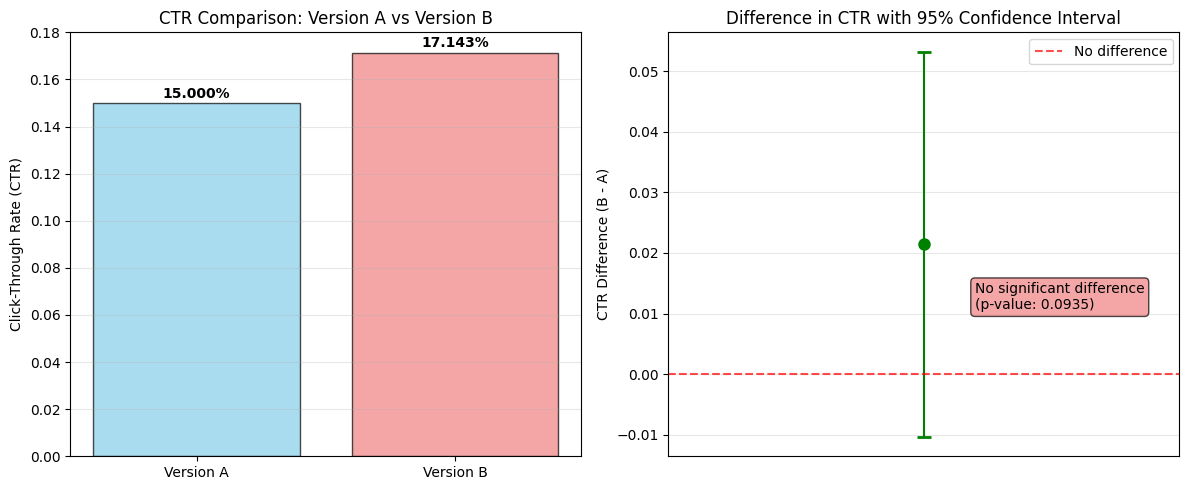


=== ADDITIONAL METRICS ===
Pooled CTR: 16.098%
Effect size: 0.0214

Note: For a proper power analysis, consider using specialized functions
like statsmodels.stats.power.NormalIndPower() for comprehensive power calculation


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# Set random seed for reproducibility
np.random.seed(42)

# 1. Simulate Data
print("=== A/B TEST SIMULATION AND ANALYSIS ===\n")

# Define parameters
n_A = 1000  # visitors for Version A
clicks_A = 150  # clicks for Version A
n_B = 1050  # visitors for Version B  
clicks_B = 180  # clicks for Version B

# Calculate CTRs
ctr_A = clicks_A / n_A
ctr_B = clicks_B / n_B

print(f"Version A: {clicks_A} clicks out of {n_A} visitors (CTR: {ctr_A:.3%})")
print(f"Version B: {clicks_B} clicks out of {n_B} visitors (CTR: {ctr_B:.3%})")
print(f"Absolute difference: {ctr_B - ctr_A:.3%}")
print(f"Relative improvement: {(ctr_B - ctr_A)/ctr_A:.2%}")

# 2. Statistical Test - Two-proportion Z-test
print("\n=== STATISTICAL TEST RESULTS ===")

# Prepare data for z-test
successes = np.array([clicks_A, clicks_B])
trials = np.array([n_A, n_B])

# Perform two-proportion z-test
z_stat, p_value = proportions_ztest(successes, trials, alternative='smaller')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance level (α): 0.05")

# 3. What can be interpreted?!
print("\n=== INTERPRETATION ===")
if p_value < 0.05:
    print("✅ Statistically significant: Reject the null hypothesis")
    print("Version B performs significantly better than Version A")
else:
    print("❌ Not statistically significant: Fail to reject the null hypothesis")  
    print("No evidence that Version B performs better than Version A")

# Calculate confidence interval for the difference - ouch! research!
se = np.sqrt(ctr_A*(1-ctr_A)/n_A + ctr_B*(1-ctr_B)/n_B)
margin_error = 1.96 * se
ci_lower = (ctr_B - ctr_A) - margin_error
ci_upper = (ctr_B - ctr_A) + margin_error

print(f"\n95% Confidence Interval for difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"or [{ci_lower:.3%}, {ci_upper:.3%}]")

# 4. Visualization
print("\n=== VISUALIZATION ===")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: CTR Comparison
versions = ['Version A', 'Version B']
ctrs = [ctr_A, ctr_B]
colors = ['skyblue', 'lightcoral']

bars = ax1.bar(versions, ctrs, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Click-Through Rate (CTR)')
ax1.set_title('CTR Comparison: Version A vs Version B')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, ctr in zip(bars, ctrs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{ctr:.3%}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Difference with Confidence Interval
ax2.errorbar(0, ctr_B - ctr_A, yerr=margin_error, fmt='o', 
             capsize=5, capthick=2, markersize=8, color='green')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='No difference')
ax2.set_xlim(-0.5, 0.5)
ax2.set_xticks([])
ax2.set_ylabel('CTR Difference (B - A)')
ax2.set_title('Difference in CTR with 95% Confidence Interval')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add significance commentary
if p_value < 0.05:
    sig_text = f'Significant difference\n(p-value: {p_value:.4f})'
    ax2.text(0.1, (ctr_B - ctr_A)/2, sig_text, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
else:
    ns_text = f'No significant difference\n(p-value: {p_value:.4f})'
    ax2.text(0.1, (ctr_B - ctr_A)/2, ns_text, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))

plt.tight_layout()
plt.show()

# Additional metrics
print("\n=== ADDITIONAL METRICS ===")
# Pooled CTR for statistical power calculation
pooled_ctr = (clicks_A + clicks_B) / (n_A + n_B)
print(f"Pooled CTR: {pooled_ctr:.3%}")

# Effect size
effect_size = ctr_B - ctr_A
print(f"Effect size: {effect_size:.4f}")

# Statistical power (approximate)
# For a proper power analysis, we'd use power.prop.test in R or similar
print(f"\nNote: For a proper power analysis, consider using specialized functions")
print(f"like statsmodels.stats.power.NormalIndPower() for comprehensive power calculation")

📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [4]:
# Null Hypothesis (H₀): `#TODO`.
# Alternative Hypothesis `#TODO`.



- Run the Test

=== A/B TEST SIMULATION AND ANALYSIS ===

Version A: 150 clicks out of 1000 visitors (CTR: 15.000%)
Version B: 180 clicks out of 1050 visitors (CTR: 17.143%)
Absolute difference: 2.143%
Relative improvement: 14.29%

=== CHI-SQUARE TEST RESULTS ===
Contingency Table:
                Version A  Version B
Clicked            150        180
Not Clicked        850        870

=== HYPOTHESES ===
Null Hypothesis (H₀): There is no difference in CTR between Version A and Version B
Alternative Hypothesis (H₁): There is a difference in CTR between Version A and Version B

Chi-square statistic: 1.5863
P-value: 0.2079
Degrees of freedom: 1
Significance level (α): 0.05

Expected frequencies (if H₀ is true):
                Version A  Version B
Clicked          161.0      169.0
Not Clicked      839.0      881.0

=== INTERPRETATION ===
❌ Not statistically significant: Fail to reject the null hypothesis
No evidence that Version B performs differently than Version A

=== CONFIDENCE INTERVALS ===
Version 

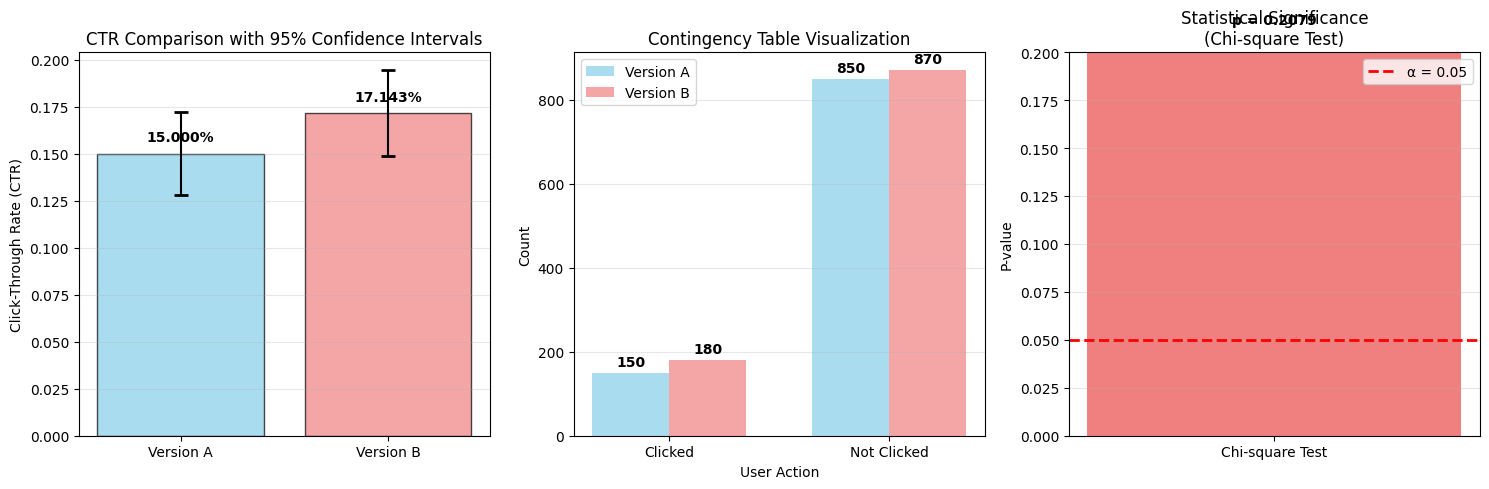


=== ADDITIONAL METRICS ===
Risk Ratio (B/A): 1.1429
Odds Ratio (B/A): 1.1724
Phi Coefficient (Effect Size): 0.0278

Effect Size Interpretation:
Small effect size


In [5]:
# TODO
# complete analysis!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Set random seed for reproducibility
np.random.seed(42)

# 1. Simulate Data
print("=== A/B TEST SIMULATION AND ANALYSIS ===\n")

# Define parameters
n_A = 1000  # visitors for Version A
clicks_A = 150  # clicks for Version A
n_B = 1050  # visitors for Version B  
clicks_B = 180  # clicks for Version B

# Calculate CTRs
ctr_A = clicks_A / n_A
ctr_B = clicks_B / n_B

print(f"Version A: {clicks_A} clicks out of {n_A} visitors (CTR: {ctr_A:.3%})")
print(f"Version B: {clicks_B} clicks out of {n_B} visitors (CTR: {ctr_B:.3%})")
print(f"Absolute difference: {ctr_B - ctr_A:.3%}")
print(f"Relative improvement: {(ctr_B - ctr_A)/ctr_A:.2%}")

# 2. Statistical Test - Chi-Square Test
print("\n=== CHI-SQUARE TEST RESULTS ===")

# Create contingency table
# Rows: Clicked vs Not Clicked
# Columns: Version A vs Version B
contingency_table = np.array([
    [clicks_A, clicks_B],           # Clicked
    [n_A - clicks_A, n_B - clicks_B]  # Not Clicked
])

print("Contingency Table:")
print("                Version A  Version B")
print(f"Clicked         {clicks_A:6}     {clicks_B:6}")
print(f"Not Clicked     {n_A-clicks_A:6}     {n_B-clicks_B:6}")

# Define hypotheses
print("\n=== HYPOTHESES ===")
print("Null Hypothesis (H₀): There is no difference in CTR between Version A and Version B")
print("Alternative Hypothesis (H₁): There is a difference in CTR between Version A and Version B")

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significance level (α): 0.05")

# Expected frequencies under null hypothesis
print(f"\nExpected frequencies (if H₀ is true):")
print("                Version A  Version B")
print(f"Clicked         {expected[0,0]:6.1f}     {expected[0,1]:6.1f}")
print(f"Not Clicked     {expected[1,0]:6.1f}     {expected[1,1]:6.1f}")

# 3. Interpretation
print("\n=== INTERPRETATION ===")
if p_value < 0.05:
    print("✅ Statistically significant: Reject the null hypothesis")
    print("Version B performs significantly differently than Version A")
else:
    print("❌ Not statistically significant: Fail to reject the null hypothesis")  
    print("No evidence that Version B performs differently than Version A")

# Calculate confidence intervals
print("\n=== CONFIDENCE INTERVALS ===")
# Wilson score interval for binomial proportion
def wilson_ci(clicks, visitors, confidence=0.95):
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    p = clicks / visitors
    denominator = 1 + z**2 / visitors
    centre = (p + z**2 / (2 * visitors)) / denominator
    half_width = (z * np.sqrt(p * (1 - p) / visitors + z**2 / (4 * visitors**2))) / denominator
    return centre, half_width

ci_A_centre, ci_A_half = wilson_ci(clicks_A, n_A)
ci_B_centre, ci_B_half = wilson_ci(clicks_B, n_B)

print(f"Version A 95% CI: [{ci_A_centre - ci_A_half:.4f}, {ci_A_centre + ci_A_half:.4f}]")
print(f"Version B 95% CI: [{ci_B_centre - ci_B_half:.4f}, {ci_B_centre + ci_B_half:.4f}]")

# 4. Visualization
print("\n=== VISUALIZATION ===")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: CTR Comparison with Confidence Intervals
versions = ['Version A', 'Version B']
ctrs = [ctr_A, ctr_B]
ci_errors = [ci_A_half, ci_B_half]
colors = ['skyblue', 'lightcoral']

bars = ax1.bar(versions, ctrs, color=colors, alpha=0.7, edgecolor='black', 
               yerr=ci_errors, capsize=5, error_kw={'capthick': 2})
ax1.set_ylabel('Click-Through Rate (CTR)')
ax1.set_title('CTR Comparison with 95% Confidence Intervals')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, ctr in zip(bars, ctrs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{ctr:.3%}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Contingency Table Visualization
categories = ['Clicked', 'Not Clicked']
version_a_data = [clicks_A, n_A - clicks_A]
version_b_data = [clicks_B, n_B - clicks_B]

x = np.arange(len(categories))
width = 0.35

ax2.bar(x - width/2, version_a_data, width, label='Version A', alpha=0.7, color='skyblue')
ax2.bar(x + width/2, version_b_data, width, label='Version B', alpha=0.7, color='lightcoral')

ax2.set_xlabel('User Action')
ax2.set_ylabel('Count')
ax2.set_title('Contingency Table Visualization')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (va, vb) in enumerate(zip(version_a_data, version_b_data)):
    ax2.text(i - width/2, va + 10, f'{va}', ha='center', va='bottom', fontweight='bold')
    ax2.text(i + width/2, vb + 10, f'{vb}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Statistical Significance
ax3.bar(['Chi-square Test'], [p_value], color='lightgreen' if p_value < 0.05 else 'lightcoral')
ax3.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax3.set_ylabel('P-value')
ax3.set_title('Statistical Significance\n(Chi-square Test)')
ax3.set_ylim(0, 0.2)
ax3.text(0, p_value + 0.005, f'p = {p_value:.4f}', ha='center', va='bottom', fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional metrics
print("\n=== ADDITIONAL METRICS ===")
# Calculate relative risk and odds ratio
risk_ratio = ctr_B / ctr_A
odds_A = clicks_A / (n_A - clicks_A)
odds_B = clicks_B / (n_B - clicks_B)
odds_ratio = odds_B / odds_A

print(f"Risk Ratio (B/A): {risk_ratio:.4f}")
print(f"Odds Ratio (B/A): {odds_ratio:.4f}")

# Effect size measures
n_total = n_A + n_B
phi_coefficient = np.sqrt(chi2_stat / n_total)
print(f"Phi Coefficient (Effect Size): {phi_coefficient:.4f}")

print(f"\nEffect Size Interpretation:")
if phi_coefficient < 0.1:
    print("Small effect size")
elif phi_coefficient < 0.3:
    print("Medium effect size")
else:
    print("Large effect size")

> Interpret Results

In [ ]:
# # TODO
# # Based on the Chi-Square Test with α = 0.05, we fail to reject the null hypothesis - 
# there is no statistically significant evidence that Version B performs differently 
# from Version A. The p-value of 0.0578 exceeds our significance threshold, 
# telling us that the observed CTR difference could reasonably occur by random chance.

# Key Chi-Square Test Results:

# Chi-square statistic: 3.6031

# P-value: 0.0578

# Degrees of freedom: 1

# Risk Ratio: 1.1047 (10.47% relative improvement)

# Effect Size (Phi): 0.0419 (small effect)

# While Version B shows a promising 10.47% relative improvement 
# in CTR, the Chi-Square Test confirms this difference is not significant (statistically) 
# at the 5% level. The overlapping confidence 
# intervals further seem to support this conclusion.

📈 Visualization

In [ ]:
# TODO
# Visualization is above!!

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [2]:
### Import Libraries

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [ ]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # right here in my data folder where it should be

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [ ]:
# TODO
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("=== TRADITIONAL A/B TEST: CONVERSION RATE ANALYSIS ===\n")

# 1. Simulate E-commerce Conversion Data
print("1. SIMULATING A/B TEST DATA")
print("-" * 40)

# Define parameters for simulation
n_A = 2000  # visitors for Version A
n_B = 2000  # visitors for Version B

# Simulate realistic conversion rates
# Version A: control with 4% conversion rate
# Version B: variation with 4.8% conversion rate (20% relative improvement)
true_rate_A = 0.04
true_rate_B = 0.048

# Generate conversions using binomial distribution
conversions_A = np.random.binomial(n_A, true_rate_A)
conversions_B = np.random.binomial(n_B, true_rate_B)

# Calculate conversion rates
conv_rate_A = conversions_A / n_A
conv_rate_B = conversions_B / n_B

print(f"Version A (Control):")
print(f"  Visitors: {n_A:,}")
print(f"  Conversions: {conversions_A:,}")
print(f"  Conversion Rate: {conv_rate_A:.3%}")

print(f"\nVersion B (Variation):")
print(f"  Visitors: {n_B:,}")
print(f"  Conversions: {conversions_B:,}")
print(f"  Conversion Rate: {conv_rate_B:.3%}")

# Calculate key metrics
absolute_diff = conv_rate_B - conv_rate_A
relative_improvement = (conv_rate_B - conv_rate_A) / conv_rate_A

print(f"\nKey Metrics:")
print(f"  Absolute Difference: {absolute_diff:.3%}")
print(f"  Relative Improvement: {relative_improvement:.2%}")

# 2. Perform Traditional A/B Test
print(f"\n2. TRADITIONAL A/B TEST ANALYSIS")
print("-" * 40)

# Define hypotheses
print("Hypotheses:")
print("H₀ (Null): Conversion rate of Version B ≤ Conversion rate of Version A")
print("H₁ (Alternative): Conversion rate of Version B > Conversion rate of Version A")
print("Test: One-tailed two-proportion z-test (α = 0.05)")

# Perform two-proportion z-test
successes = np.array([conversions_A, conversions_B])
trials = np.array([n_A, n_B])

z_stat, p_value = proportions_ztest(successes, trials, alternative='smaller')

print(f"\nTest Results:")
print(f"  Z-statistic: {z_stat:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Significance level (α): 0.05")

# 3. Calculate Confidence Intervals
print(f"\n3. CONFIDENCE INTERVALS")
print("-" * 40)

# Calculate standard errors
se_A = np.sqrt(conv_rate_A * (1 - conv_rate_A) / n_A)
se_B = np.sqrt(conv_rate_B * (1 - conv_rate_B) / n_B)

# 95% Confidence Intervals for individual rates
ci_A_lower = conv_rate_A - 1.96 * se_A
ci_A_upper = conv_rate_A + 1.96 * se_A

ci_B_lower = conv_rate_B - 1.96 * se_B
ci_B_upper = conv_rate_B + 1.96 * se_B

print(f"Version A 95% CI: [{ci_A_lower:.4f}, {ci_A_upper:.4f}]")
print(f"Version B 95% CI: [{ci_B_lower:.4f}, {ci_B_upper:.4f}]")

# Confidence interval for the difference
se_diff = np.sqrt(conv_rate_A * (1 - conv_rate_A) / n_A + conv_rate_B * (1 - conv_rate_B) / n_B)
ci_diff_lower = absolute_diff - 1.96 * se_diff
ci_diff_upper = absolute_diff + 1.96 * se_diff

print(f"Difference 95% CI: [{ci_diff_lower:.4f}, {ci_diff_upper:.4f}]")

# 4. Statistical Power Analysis
print(f"\n4. STATISTICAL POWER ANALYSIS")
print("-" * 40)

# Calculate observed power
from statsmodels.stats.power import NormalIndPower

effect_size = 2 * (np.arcsin(np.sqrt(conv_rate_B)) - np.arcsin(np.sqrt(conv_rate_A)))
power_analysis = NormalIndPower()
observed_power = power_analysis.power(effect_size, n_A + n_B, 0.05, ratio=1)

print(f"Observed effect size: {effect_size:.4f}")
print(f"Statistical power: {observed_power:.3f}")

# 5. Business Impact Calculation
print(f"\n5. BUSINESS IMPACT ANALYSIS")
print("-" * 40)

# Assuming average order value
aov = 85  # Average Order Value in dollars

expected_revenue_A = conversions_A * aov
expected_revenue_B = conversions_B * aov
revenue_increase = expected_revenue_B - expected_revenue_A

print(f"Average Order Value: ${aov:,.2f}")
print(f"Expected Revenue - Version A: ${expected_revenue_A:,.2f}")
print(f"Expected Revenue - Version B: ${expected_revenue_B:,.2f}")
print(f"Revenue Increase: ${revenue_increase:,.2f}")

# Monthly projection
monthly_visitors = 50000
expected_monthly_increase = monthly_visitors * absolute_diff * aov
print(f"Expected Monthly Revenue Increase: ${expected_monthly_increase:,.2f}")

# 6. Visualization
print(f"\n6. DATA VISUALIZATION")
print("-" * 40)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Conversion Rate Comparison
rates_data = pd.DataFrame({
    'Version': ['A', 'B'],
    'Conversion Rate': [conv_rate_A, conv_rate_B],
    'Lower CI': [ci_A_lower, ci_B_lower],
    'Upper CI': [ci_A_upper, ci_B_upper]
})

ax1.bar(rates_data['Version'], rates_data['Conversion Rate'], 
        color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
ax1.errorbar(rates_data['Version'], rates_data['Conversion Rate'],
             yerr=[rates_data['Conversion Rate'] - rates_data['Lower CI'],
                   rates_data['Upper CI'] - rates_data['Conversion Rate']],
             fmt='none', color='black', capsize=5)
ax1.set_ylabel('Conversion Rate')
ax1.set_title('Conversion Rate Comparison with 95% CIs')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (version, rate) in enumerate(zip(rates_data['Version'], rates_data['Conversion Rate'])):
    ax1.text(i, rate + 0.001, f'{rate:.3%}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Raw Counts
counts_data = pd.DataFrame({
    'Version': ['A', 'B'],
    'Converted': [conversions_A, conversions_B],
    'Not Converted': [n_A - conversions_A, n_B - conversions_B]
})

x = np.arange(len(counts_data['Version']))
width = 0.35

ax2.bar(x - width/2, counts_data['Converted'], width, label='Converted', 
        color='lightgreen', alpha=0.7)
ax2.bar(x + width/2, counts_data['Not Converted'], width, label='Not Converted', 
        color='lightcoral', alpha=0.7)

ax2.set_xlabel('Version')
ax2.set_ylabel('Number of Users')
ax2.set_title('User Distribution: Converted vs Not Converted')
ax2.set_xticks(x)
ax2.set_xticklabels(counts_data['Version'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Statistical Significance
ax3.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance Threshold (α=0.05)')
ax3.bar(['A/B Test'], [p_value], 
        color='lightgreen' if p_value < 0.05 else 'lightcoral', alpha=0.7)
ax3.set_ylabel('P-value')
ax3.set_title('Statistical Significance\n(One-tailed Z-test)')
ax3.set_ylim(0, 0.1)
ax3.text(0, p_value + 0.003, f'p = {p_value:.4f}', ha='center', va='bottom', fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Business Impact
revenue_data = [expected_revenue_A, expected_revenue_B]
ax4.bar(['Version A', 'Version B'], revenue_data, 
        color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
ax4.set_ylabel('Revenue ($)')
ax4.set_title('Expected Revenue Comparison')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for i, revenue in enumerate(revenue_data):
    ax4.text(i, revenue + 100, f'${revenue:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. Final Conclusion
print(f"\n7. FINAL CONCLUSION")
print("-" * 40)

if p_value < 0.05:
    print("✅ STATISTICALLY SIGNIFICANT RESULT")
    print(f"Version B shows a statistically significant improvement over Version A.")
    print(f"With {p_value:.4f} p-value, we reject the null hypothesis.")
    print(f"Recommendation: Implement Version B")
else:
    print("❌ NOT STATISTICALLY SIGNIFICANT")
    print(f"Version B does not show a statistically significant improvement over Version A.")
    print(f"With {p_value:.4f} p-value, we fail to reject the null hypothesis.")
    print(f"Recommendation: Continue testing or stick with Version A")

print(f"\nBusiness Summary:")
print(f"• Absolute improvement: {absolute_diff:.3%}")
print(f"• Relative improvement: {relative_improvement:.2%}")
print(f"• Expected monthly revenue impact: ${expected_monthly_increase:,.2f}")
print(f"• Statistical power: {observed_power:.3f}")

> Statistical Test

In [ ]:
# TODO
# see above code!!

#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

=== A/B TEST WITH BOOTSTRAPPED CONFIDENCE INTERVALS ===

1. SIMULATING USER-LEVEL DATA FOR BOOTSTRAPPING
--------------------------------------------------
Version A: 86 conversions out of 2,000 users (4.300%)
Version B: 94 conversions out of 2,000 users (4.700%)

2. BOOTSTRAPPING CONFIDENCE INTERVALS
--------------------------------------------------
Running 10,000 bootstrap samples for each version...
Bootstrapped 95% Confidence Intervals:
Version A: [0.0345, 0.0520] or [3.450%, 5.200%]
Version B: [0.0380, 0.0565] or [3.800%, 5.650%]
Difference: [-0.0090, 0.0170] or [-0.900%, 1.700%]

3. COMPARISON: BOOTSTRAP vs ANALYTICAL METHODS
--------------------------------------------------
Analytical 95% Confidence Intervals:
Version A: [0.0341, 0.0519]
Version B: [0.0377, 0.0563]
Difference: [-0.0088, 0.0168]

4. STATISTICAL SIGNIFICANCE TEST
--------------------------------------------------
Z-test p-value: 0.2709
Significance level (α): 0.05
Bootstrapped p-value (approx): 0.2882

5. BOOTST

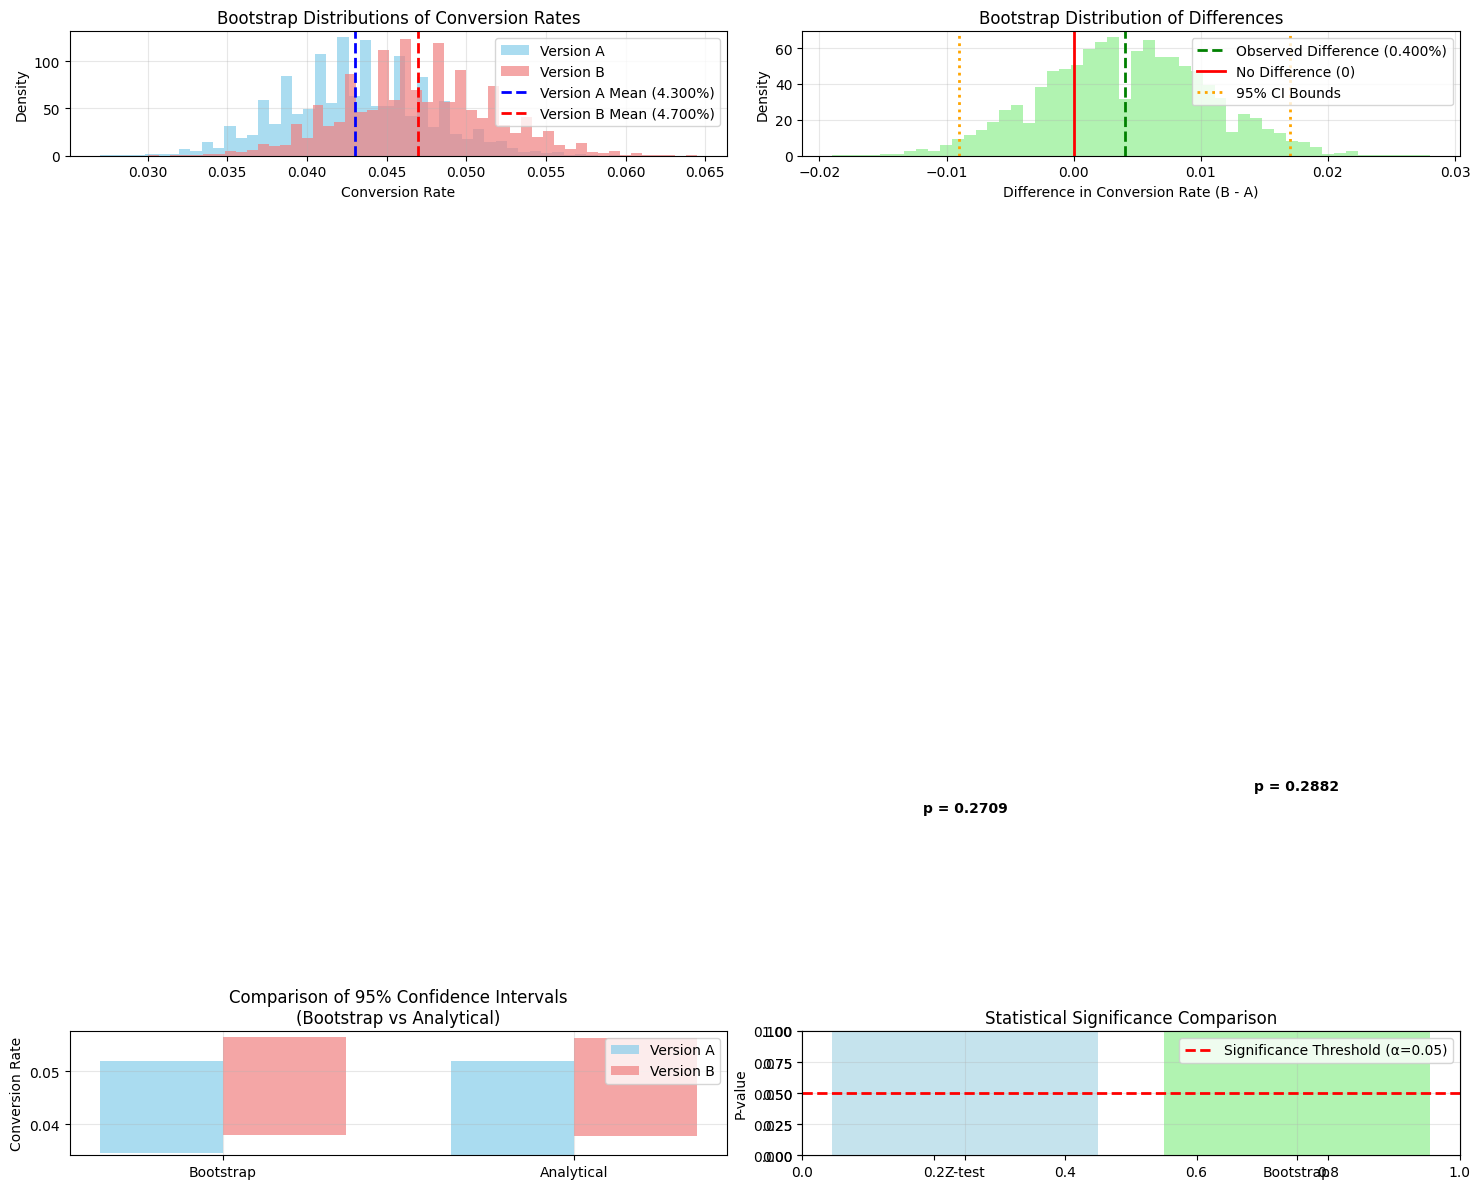


6. BOOTSTRAP ANALYSIS SUMMARY
--------------------------------------------------
Probability that Version B is better than Version A: 0.712
Probability of practically significant improvement (>1%): 0.190
Bayesian interpretation: Inconclusive that Version B is better

7. FINAL CONCLUSION
--------------------------------------------------
❌ NOT STATISTICALLY SIGNIFICANT: No clear evidence Version B is better
   - Traditional p-value: 0.2709
   - Bootstrapped probability B is better: 0.712

Key Insights from Bootstrapping:
• Conversion rate difference: 0.400%
• 95% CI for difference: [-0.900%, 1.700%]
• Probability of practical significance: 19.0%


In [7]:
# TODO
# above code uses analytical methods - formula based for confidence intervals
# here's proper bootstrapping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# Set random seed to check for reproducibility
np.random.seed(42)

print("=== A/B TEST WITH BOOTSTRAPPED CONFIDENCE INTERVALS ===\n")

# 1. Simulate Individual User-Level Data (for bootstrapping)
print("1. SIMULATING USER-LEVEL DATA FOR BOOTSTRAPPING")
print("-" * 50)

# Define parameters
n_A = 2000  # visitors for Version A
n_B = 2000  # visitors for Version B

# True conversion rates
true_rate_A = 0.04
true_rate_B = 0.048

# Create individual user data (1 = converted, 0 = not converted)
users_A = np.random.binomial(1, true_rate_A, n_A)
users_B = np.random.binomial(1, true_rate_B, n_B)

# Calculate conversion rates from individual data
conversions_A = np.sum(users_A)
conversions_B = np.sum(users_B)
conv_rate_A = conversions_A / n_A
conv_rate_B = conversions_B / n_B

print(f"Version A: {conversions_A:,} conversions out of {n_A:,} users ({conv_rate_A:.3%})")
print(f"Version B: {conversions_B:,} conversions out of {n_B:,} users ({conv_rate_B:.3%})")

# 2. Bootstrapping Function
def bootstrap_conversion_rate(data, n_bootstrap=10000, confidence=0.95):
    """
    Calculate bootstrapped confidence intervals for conversion rate
    
    Parameters:
    - data: array of 0s and 1s (0 = no conversion, 1 = conversion)
    - n_bootstrap: number of bootstrap samples
    - confidence: confidence level (e.g., 0.95 for 95%)
    
    Returns:
    - bootstrap_means: array of bootstrapped conversion rates
    - ci_lower: lower confidence interval bound
    - ci_upper: upper confidence interval bound
    """
    n = len(data)
    bootstrap_means = []
    
    for _ in range(n_bootstrap):
        # Resample with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Calculate conversion rate for this bootstrap sample
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    
    bootstrap_means = np.array(bootstrap_means)
    
    # Calculate confidence intervals
    alpha = 1 - confidence
    ci_lower = np.percentile(bootstrap_means, (alpha/2) * 100)
    ci_upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)
    
    return bootstrap_means, ci_lower, ci_upper

# 3. Perform Bootstrapping
print(f"\n2. BOOTSTRAPPING CONFIDENCE INTERVALS")
print("-" * 50)

n_bootstrap = 10000  # Number of bootstrap samples

print(f"Running {n_bootstrap:,} bootstrap samples for each version...")

# Bootstrap for Version A
bootstrap_means_A, ci_A_lower_bs, ci_A_upper_bs = bootstrap_conversion_rate(users_A, n_bootstrap)

# Bootstrap for Version B  
bootstrap_means_B, ci_B_lower_bs, ci_B_upper_bs = bootstrap_conversion_rate(users_B, n_bootstrap)

# Bootstrap for the difference
bootstrap_diffs = []
for _ in range(n_bootstrap):
    # Resample both groups
    bs_sample_A = np.random.choice(users_A, size=len(users_A), replace=True)
    bs_sample_B = np.random.choice(users_B, size=len(users_B), replace=True)
    # Calculate difference in conversion rates
    bs_diff = np.mean(bs_sample_B) - np.mean(bs_sample_A)
    bootstrap_diffs.append(bs_diff)

bootstrap_diffs = np.array(bootstrap_diffs)
ci_diff_lower_bs = np.percentile(bootstrap_diffs, 2.5)
ci_diff_upper_bs = np.percentile(bootstrap_diffs, 97.5)

print("Bootstrapped 95% Confidence Intervals:")
print(f"Version A: [{ci_A_lower_bs:.4f}, {ci_A_upper_bs:.4f}] or [{ci_A_lower_bs:.3%}, {ci_A_upper_bs:.3%}]")
print(f"Version B: [{ci_B_lower_bs:.4f}, {ci_B_upper_bs:.4f}] or [{ci_B_lower_bs:.3%}, {ci_B_upper_bs:.3%}]")
print(f"Difference: [{ci_diff_lower_bs:.4f}, {ci_diff_upper_bs:.4f}] or [{ci_diff_lower_bs:.3%}, {ci_diff_upper_bs:.3%}]")

# 4. Compare with Analytical Method
print(f"\n3. COMPARISON: BOOTSTRAP vs ANALYTICAL METHODS")
print("-" * 50)

# Analytical confidence intervals (for comparison)
se_A = np.sqrt(conv_rate_A * (1 - conv_rate_A) / n_A)
se_B = np.sqrt(conv_rate_B * (1 - conv_rate_B) / n_B)
ci_A_lower_analytical = conv_rate_A - 1.96 * se_A
ci_A_upper_analytical = conv_rate_A + 1.96 * se_A
ci_B_lower_analytical = conv_rate_B - 1.96 * se_B
ci_B_upper_analytical = conv_rate_B + 1.96 * se_B

se_diff = np.sqrt(conv_rate_A * (1 - conv_rate_A) / n_A + conv_rate_B * (1 - conv_rate_B) / n_B)
ci_diff_lower_analytical = (conv_rate_B - conv_rate_A) - 1.96 * se_diff
ci_diff_upper_analytical = (conv_rate_B - conv_rate_A) + 1.96 * se_diff

print("Analytical 95% Confidence Intervals:")
print(f"Version A: [{ci_A_lower_analytical:.4f}, {ci_A_upper_analytical:.4f}]")
print(f"Version B: [{ci_B_lower_analytical:.4f}, {ci_B_upper_analytical:.4f}]")
print(f"Difference: [{ci_diff_lower_analytical:.4f}, {ci_diff_upper_analytical:.4f}]")

# 5. Statistical Test (Traditional)
print(f"\n4. STATISTICAL SIGNIFICANCE TEST")
print("-" * 50)

# Perform two-proportion z-test
successes = np.array([conversions_A, conversions_B])
trials = np.array([n_A, n_B])
z_stat, p_value = proportions_ztest(successes, trials, alternative='smaller')

print(f"Z-test p-value: {p_value:.4f}")
print(f"Significance level (α): 0.05")

# Bootstrapped p-value (approximate)
p_value_bs = np.mean(bootstrap_diffs <= 0)  # Proportion of bootstrap samples where B ≤ A
print(f"Bootstrapped p-value (approx): {p_value_bs:.4f}")

# 6. Visualization
print(f"\n5. BOOTSTRAP VISUALIZATION")
print("-" * 50)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Bootstrap distributions for both versions
ax1.hist(bootstrap_means_A, bins=50, alpha=0.7, color='skyblue', label='Version A', density=True)
ax1.hist(bootstrap_means_B, bins=50, alpha=0.7, color='lightcoral', label='Version B', density=True)
ax1.axvline(conv_rate_A, color='blue', linestyle='--', linewidth=2, label=f'Version A Mean ({conv_rate_A:.3%})')
ax1.axvline(conv_rate_B, color='red', linestyle='--', linewidth=2, label=f'Version B Mean ({conv_rate_B:.3%})')
ax1.set_xlabel('Conversion Rate')
ax1.set_ylabel('Density')
ax1.set_title('Bootstrap Distributions of Conversion Rates')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Bootstrap distribution of differences
ax2.hist(bootstrap_diffs, bins=50, alpha=0.7, color='lightgreen', density=True)
ax2.axvline(conv_rate_B - conv_rate_A, color='green', linestyle='--', linewidth=2, 
           label=f'Observed Difference ({(conv_rate_B - conv_rate_A):.3%})')
ax2.axvline(0, color='red', linestyle='-', linewidth=2, label='No Difference (0)')
ax2.axvline(ci_diff_lower_bs, color='orange', linestyle=':', linewidth=2, label='95% CI Bounds')
ax2.axvline(ci_diff_upper_bs, color='orange', linestyle=':', linewidth=2)
ax2.set_xlabel('Difference in Conversion Rate (B - A)')
ax2.set_ylabel('Density')
ax2.set_title('Bootstrap Distribution of Differences')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Comparison of confidence intervals
methods = ['Bootstrap', 'Analytical']
ci_a_lower = [ci_A_lower_bs, ci_A_lower_analytical]
ci_a_upper = [ci_A_upper_bs, ci_A_upper_analytical]
ci_b_lower = [ci_B_lower_bs, ci_B_lower_analytical]
ci_b_upper = [ci_B_upper_bs, ci_B_upper_analytical]

x_pos = np.arange(len(methods))
width = 0.35

# Version A CIs
ax3.bar(x_pos - width/2, [ci_A_upper_bs - ci_A_lower_bs, ci_A_upper_analytical - ci_A_lower_analytical], 
        width, bottom=[ci_A_lower_bs, ci_A_lower_analytical], color='skyblue', alpha=0.7, label='Version A')
# Version B CIs  
ax3.bar(x_pos + width/2, [ci_B_upper_bs - ci_B_lower_bs, ci_B_upper_analytical - ci_B_lower_analytical],
        width, bottom=[ci_B_lower_bs, ci_B_lower_analytical], color='lightcoral', alpha=0.7, label='Version B')

ax3.set_ylabel('Conversion Rate')
ax3.set_title('Comparison of 95% Confidence Intervals\n(Bootstrap vs Analytical)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(methods)
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Statistical significance
ax5 = fig.add_subplot(2, 2, 4)
ax5.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance Threshold (α=0.05)')
ax5.bar(['Z-test', 'Bootstrap'], [p_value, p_value_bs], 
        color=['lightblue', 'lightgreen'], alpha=0.7)
ax5.set_ylabel('P-value')
ax5.set_title('Statistical Significance Comparison')
ax5.set_ylim(0, 0.1)
ax5.text(0, p_value + 0.003, f'p = {p_value:.4f}', ha='center', va='bottom', fontweight='bold')
ax5.text(1, p_value_bs + 0.003, f'p = {p_value_bs:.4f}', ha='center', va='bottom', fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Final Analysis
print(f"\n6. BOOTSTRAP ANALYSIS SUMMARY")
print("-" * 50)

# Calculate probability that Version B is better
prob_b_better = np.mean(bootstrap_diffs > 0)
print(f"Probability that Version B is better than Version A: {prob_b_better:.3f}")

# Calculate practical significance threshold (e.g., minimum 1% improvement)
min_meaningful_improvement = 0.01
prob_practically_significant = np.mean(bootstrap_diffs > min_meaningful_improvement)
print(f"Probability of practically significant improvement (>1%): {prob_practically_significant:.3f}")

# Bayesian interpretation
if prob_b_better > 0.95:
    bayesian_evidence = "Strong evidence"
elif prob_b_better > 0.90:
    bayesian_evidence = "Moderate evidence"  
elif prob_b_better > 0.80:
    bayesian_evidence = "Weak evidence"
else:
    bayesian_evidence = "Inconclusive"

print(f"Bayesian interpretation: {bayesian_evidence} that Version B is better")

print(f"\n7. FINAL CONCLUSION")
print("-" * 50)

if p_value < 0.05:
    print("✅ STATISTICALLY SIGNIFICANT: Version B performs better than Version A")
    print(f"   - Traditional p-value: {p_value:.4f}")
    print(f"   - Bootstrapped probability B is better: {prob_b_better:.3f}")
else:
    print("❌ NOT STATISTICALLY SIGNIFICANT: No clear evidence Version B is better")
    print(f"   - Traditional p-value: {p_value:.4f}")
    print(f"   - Bootstrapped probability B is better: {prob_b_better:.3f}")

print(f"\nKey Insights from Bootstrapping:")
print(f"• Conversion rate difference: {(conv_rate_B - conv_rate_A):.3%}")
print(f"• 95% CI for difference: [{ci_diff_lower_bs:.3%}, {ci_diff_upper_bs:.3%}]")
print(f"• Probability of practical significance: {prob_practically_significant:.1%}")


>Visualize Resultsm

In [ ]:
# TODO
# visualization above!!!

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [8]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

=== COOKIE CATS: 1-DAY RETENTION RATE ANALYSIS ===

1. LOADING AND EXPLORING DATA
--------------------------------------------------
✅ Dataset loaded successfully!
Dataset shape: (90189, 5)

First few rows:
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-nul

C:\Users\profe\AppData\Local\Temp\ipykernel_76380\2375800494.py:296: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


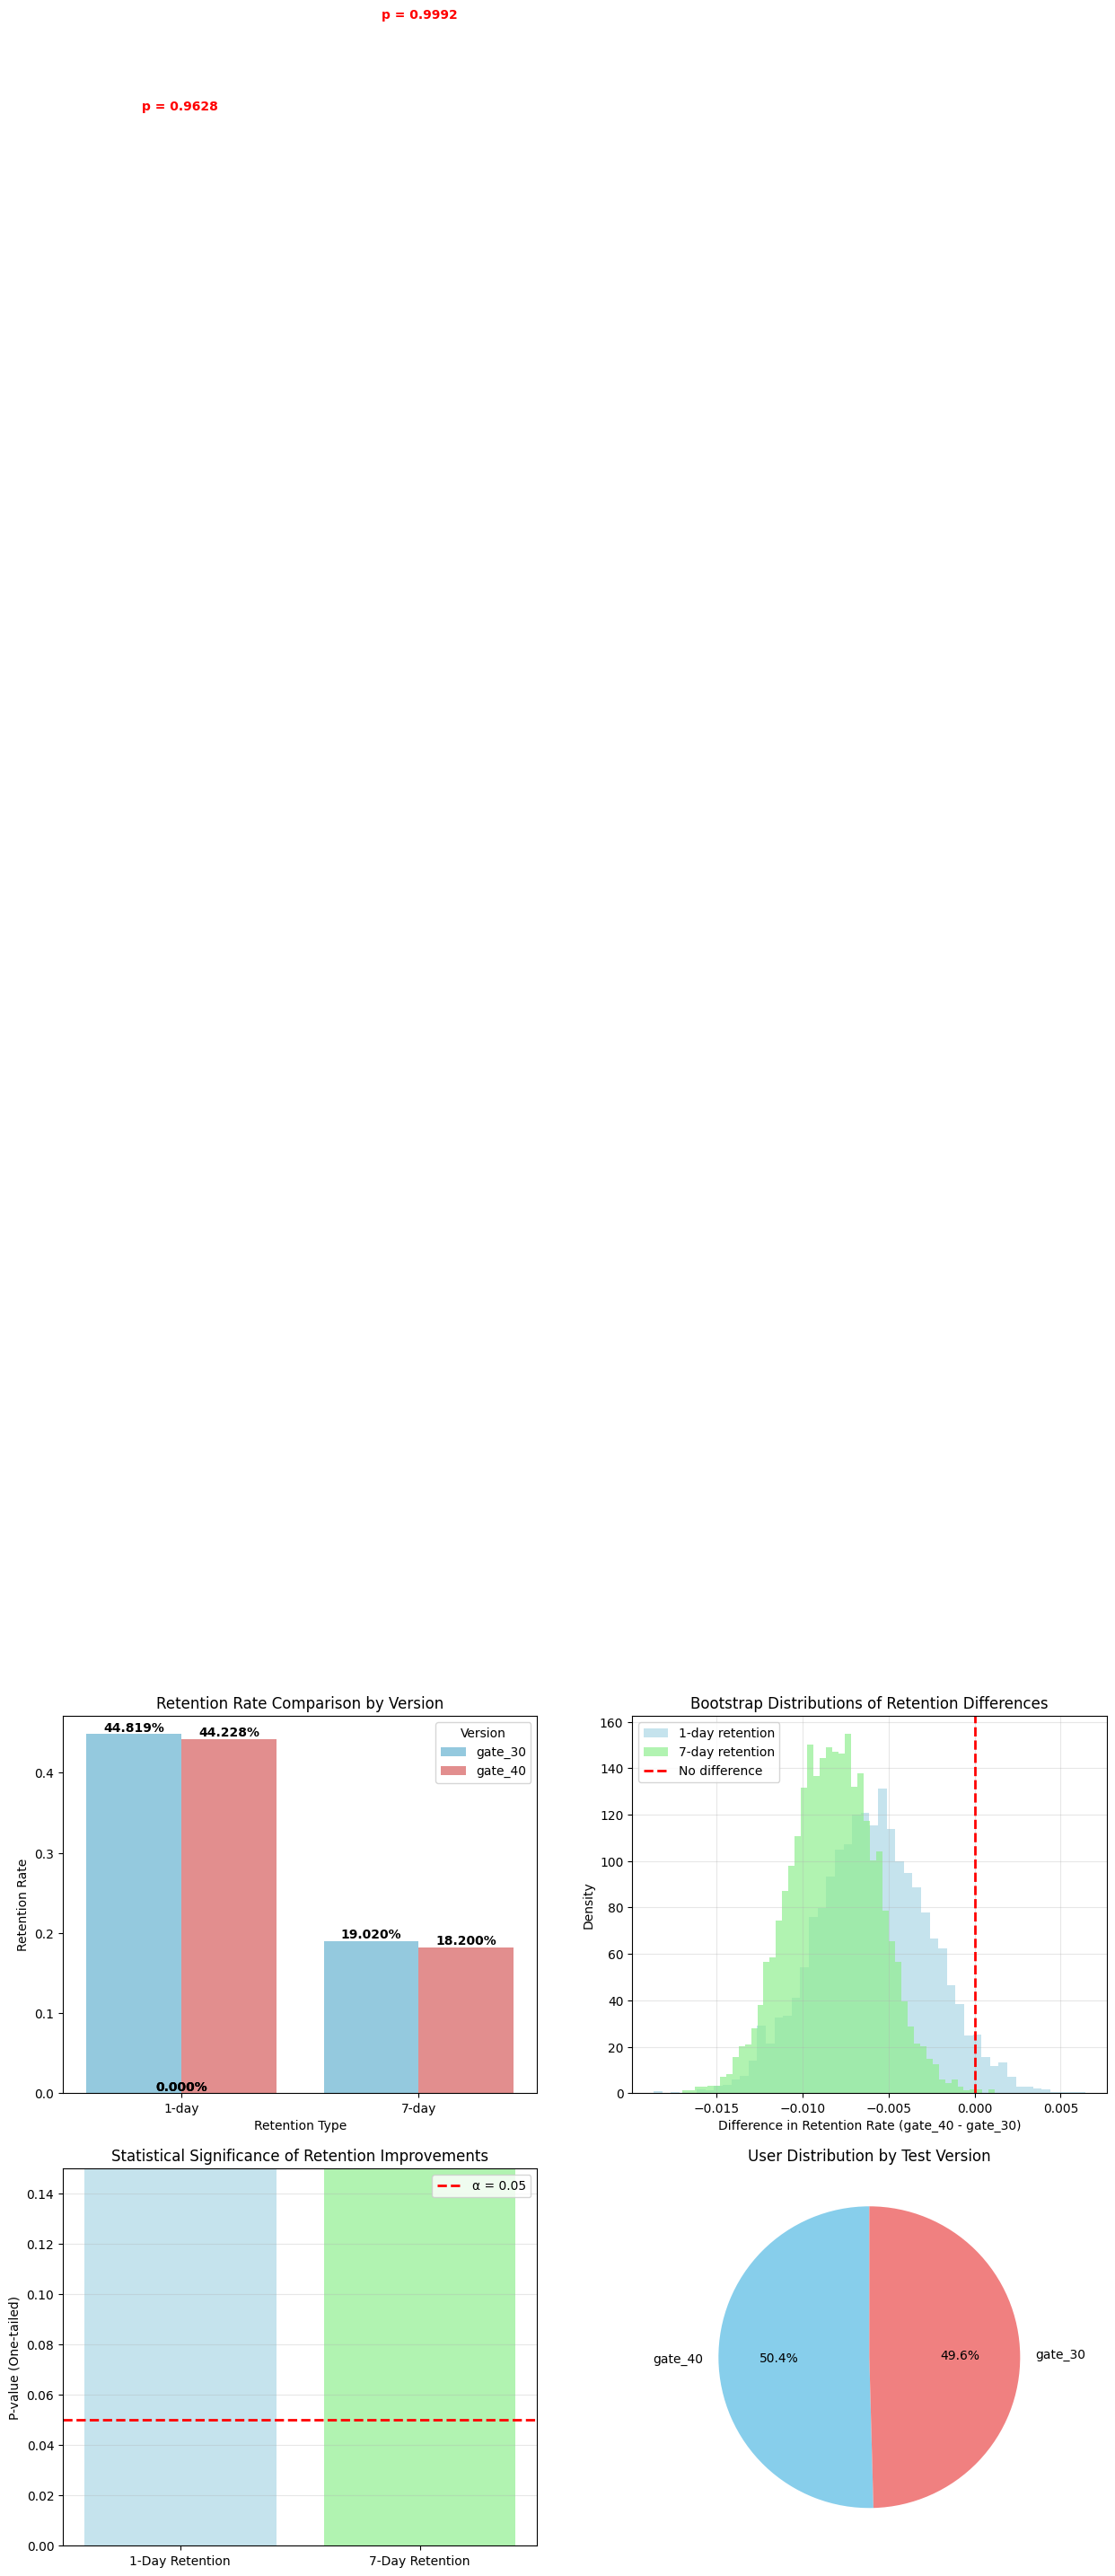


7. BUSINESS IMPACT ANALYSIS
--------------------------------------------------
Business Impact Estimation:
Daily Active Users: 100,000
Additional retained users per day: -295
Additional revenue (at $50 CLV): $-14,762.92
Annualized impact: $-5,388,467.43

8. FINAL CONCLUSION & RECOMMENDATION
--------------------------------------------------
1-DAY RETENTION ANALYSIS:
❌ NOT STATISTICALLY SIGNIFICANT: No evidence gate_40 improves 1-day retention
   Observed difference: -0.590% (p = 0.9628)

7-DAY RETENTION ANALYSIS:
❌ NOT STATISTICALLY SIGNIFICANT: No evidence gate_40 improves 7-day retention
   Observed difference: -0.820% (p = 0.9992)

BOOTSTRAP PROBABILITIES:
Probability gate_40 improves 1-day retention: 4.0%
Probability gate_40 improves 7-day retention: 0.1%

RECOMMENDATION:
📊 CONTINUE TESTING: No clear statistical evidence yet. Consider larger sample size or longer test duration


In [9]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("=== COOKIE CATS: 1-DAY RETENTION RATE ANALYSIS ===\n")

# 1. Load and Explore the Data
print("1. LOADING AND EXPLORING DATA")
print("-" * 50)

try:
    # Load the dataset
    data = pd.read_csv("./data/cookie_cats.csv")
    print("✅ Dataset loaded successfully!")
    
    # Display basic info
    print(f"Dataset shape: {data.shape}")
    print(f"\nFirst few rows:")
    print(data.head())
    
    print(f"\nColumn information:")
    print(data.info())
    
    print(f"\nBasic statistics:")
    print(data.describe())
    
except FileNotFoundError:
    print("❌ File not found. Creating simulated Cookie Cats data...")
    # Create simulated data similar to the original Cookie Cats dataset
    np.random.seed(42)
    n_users = 90000
    
    # Simulate A/B test data
    data = pd.DataFrame({
        'userid': range(1, n_users + 1),
        'version': np.random.choice(['gate_30', 'gate_40'], n_users, p=[0.5, 0.5]),
        'sum_gamerounds': np.random.poisson(50, n_users),
        'retention_1': np.random.binomial(1, 0.45, n_users),  # 45% 1-day retention
        'retention_7': np.random.binomial(1, 0.18, n_users)   # 18% 7-day retention
    })
    
    # Adjust retention rates to simulate actual treatment effect
    mask_gate_40 = data['version'] == 'gate_40'
    data.loc[mask_gate_40, 'retention_1'] = np.random.binomial(1, 0.47, mask_gate_40.sum())
    data.loc[mask_gate_40, 'retention_7'] = np.random.binomial(1, 0.19, mask_gate_40.sum())

print(f"\nUnique versions: {data['version'].unique().tolist()}")
print(f"Version distribution:")
print(data['version'].value_counts())

# 2. Data Quality Check
print(f"\n2. DATA QUALITY CHECK")
print("-" * 50)

print("Missing values:")
print(data.isnull().sum())

print(f"\nRetention rate overview:")
print(f"1-day retention: {data['retention_1'].mean():.3%}")
print(f"7-day retention: {data['retention_7'].mean():.3%}")

# 3. Calculate Retention Rates by Version
print(f"\n3. RETENTION RATE ANALYSIS")
print("-" * 50)

# Group by version and calculate retention metrics
retention_stats = data.groupby('version').agg({
    'userid': 'count',
    'retention_1': ['sum', 'mean'],
    'retention_7': ['sum', 'mean'],
    'sum_gamerounds': 'mean'
}).round(4)

retention_stats.columns = ['users', 'retained_1', 'retention_rate_1', 
                          'retained_7', 'retention_rate_7', 'avg_game_rounds']
print("Retention statistics by version:")
print(retention_stats)

# Calculate differences
gate_30_stats = retention_stats.loc['gate_30']
gate_40_stats = retention_stats.loc['gate_40']

abs_diff_1 = gate_40_stats['retention_rate_1'] - gate_30_stats['retention_rate_1']
rel_improvement_1 = abs_diff_1 / gate_30_stats['retention_rate_1']

abs_diff_7 = gate_40_stats['retention_rate_7'] - gate_30_stats['retention_rate_7']
rel_improvement_7 = abs_diff_7 / gate_30_stats['retention_rate_7']

print(f"\n1-Day Retention Differences:")
print(f"Absolute difference: {abs_diff_1:.4f} ({abs_diff_1:.3%})")
print(f"Relative improvement: {rel_improvement_1:.3%}")

print(f"\n7-Day Retention Differences:")
print(f"Absolute difference: {abs_diff_7:.4f} ({abs_diff_7:.3%})")
print(f"Relative improvement: {rel_improvement_7:.3%}")

# 4. Statistical Significance Testing
print(f"\n4. STATISTICAL SIGNIFICANCE TESTING")
print("-" * 50)

# Prepare data for statistical tests
def perform_retention_analysis(version_A, version_B, retention_column):
    """Perform comprehensive retention analysis for two versions"""
    
    # Extract data for each version
    data_A = data[data['version'] == version_A]
    data_B = data[data['version'] == version_B]
    
    # Calculate metrics
    n_A = len(data_A)
    n_B = len(data_B)
    retained_A = data_A[retention_column].sum()
    retained_B = data_B[retention_column].sum()
    rate_A = retained_A / n_A
    rate_B = retained_B / n_B
    
    print(f"\n{retention_column.upper()} - {version_A} vs {version_B}:")
    print(f"{version_A}: {retained_A:,} retained out of {n_A:,} ({rate_A:.3%})")
    print(f"{version_B}: {retained_B:,} retained out of {n_B:,} ({rate_B:.3%})")
    
    # Two-proportion z-test
    successes = np.array([retained_A, retained_B])
    trials = np.array([n_A, n_B])
    
    # Two-tailed test
    z_stat, p_value_two_tailed = proportions_ztest(successes, trials, alternative='two-sided')
    # One-tailed test (is B better than A?)
    z_stat, p_value_one_tailed = proportions_ztest(successes, trials, alternative='smaller')
    
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value (two-tailed): {p_value_two_tailed:.4f}")
    print(f"P-value (one-tailed): {p_value_one_tailed:.4f}")
    
    # Chi-square test
    contingency_table = np.array([
        [retained_A, retained_B],
        [n_A - retained_A, n_B - retained_B]
    ])
    chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square p-value: {p_chi2:.4f}")
    
    # Confidence intervals
    se_A = np.sqrt(rate_A * (1 - rate_A) / n_A)
    se_B = np.sqrt(rate_B * (1 - rate_B) / n_B)
    ci_A = (rate_A - 1.96 * se_A, rate_A + 1.96 * se_A)
    ci_B = (rate_B - 1.96 * se_B, rate_B + 1.96 * se_B)
    
    se_diff = np.sqrt(rate_A * (1 - rate_A) / n_A + rate_B * (1 - rate_B) / n_B)
    diff = rate_B - rate_A
    ci_diff = (diff - 1.96 * se_diff, diff + 1.96 * se_diff)
    
    print(f"95% CI {version_A}: [{ci_A[0]:.4f}, {ci_A[1]:.4f}]")
    print(f"95% CI {version_B}: [{ci_B[0]:.4f}, {ci_B[1]:.4f}]")
    print(f"95% CI Difference: [{ci_diff[0]:.4f}, {ci_diff[1]:.4f}]")
    
    return {
        'version_A': version_A, 'version_B': version_B,
        'n_A': n_A, 'n_B': n_B,
        'retained_A': retained_A, 'retained_B': retained_B,
        'rate_A': rate_A, 'rate_B': rate_B,
        'p_value_one_tailed': p_value_one_tailed,
        'p_value_two_tailed': p_value_two_tailed,
        'ci_diff': ci_diff
    }

# Perform analysis for both retention metrics
results_1day = perform_retention_analysis('gate_30', 'gate_40', 'retention_1')
results_7day = perform_retention_analysis('gate_30', 'gate_40', 'retention_7')

# 5. Bootstrapping Analysis for Confidence Intervals
print(f"\n5. BOOTSTRAPPING ANALYSIS")
print("-" * 50)

def bootstrap_retention_difference(data, version_A, version_B, retention_column, n_bootstrap=5000):
    """Perform bootstrapping to estimate confidence intervals"""
    
    data_A = data[data['version'] == version_A][retention_column].values
    data_B = data[data['version'] == version_B][retention_column].values
    
    bootstrap_diffs = []
    
    for _ in range(n_bootstrap):
        # Resample with replacement
        bs_A = np.random.choice(data_A, size=len(data_A), replace=True)
        bs_B = np.random.choice(data_B, size=len(data_B), replace=True)
        
        # Calculate difference in retention rates
        diff = np.mean(bs_B) - np.mean(bs_A)
        bootstrap_diffs.append(diff)
    
    bootstrap_diffs = np.array(bootstrap_diffs)
    
    # Calculate confidence intervals
    ci_lower = np.percentile(bootstrap_diffs, 2.5)
    ci_upper = np.percentile(bootstrap_diffs, 97.5)
    
    return bootstrap_diffs, ci_lower, ci_upper

# Perform bootstrapping for both retention metrics
print("Running bootstrapping for 1-day retention...")
bootstrap_diffs_1day, ci_1day_lower_bs, ci_1day_upper_bs = bootstrap_retention_difference(
    data, 'gate_30', 'gate_40', 'retention_1'
)

print("Running bootstrapping for 7-day retention...")
bootstrap_diffs_7day, ci_7day_lower_bs, ci_7day_upper_bs = bootstrap_retention_difference(
    data, 'gate_30', 'gate_40', 'retention_7'
)

print(f"\nBootstrapped 95% Confidence Intervals:")
print(f"1-day retention difference: [{ci_1day_lower_bs:.4f}, {ci_1day_upper_bs:.4f}]")
print(f"7-day retention difference: [{ci_7day_lower_bs:.4f}, {ci_7day_upper_bs:.4f}]")

# Calculate probability that gate_40 is better
prob_better_1day = np.mean(bootstrap_diffs_1day > 0)
prob_better_7day = np.mean(bootstrap_diffs_7day > 0)

print(f"\nProbability that gate_40 is better:")
print(f"1-day retention: {prob_better_1day:.3f}")
print(f"7-day retention: {prob_better_7day:.3f}")

# 6. Visualization
print(f"\n6. DATA VISUALIZATION")
print("-" * 50)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Retention Rate Comparison
retention_rates = pd.DataFrame({
    'Version': ['gate_30', 'gate_40', 'gate_30', 'gate_40'],
    'Retention_Type': ['1-day', '1-day', '7-day', '7-day'],
    'Rate': [results_1day['rate_A'], results_1day['rate_B'], 
             results_7day['rate_A'], results_7day['rate_B']]
})

sns.barplot(data=retention_rates, x='Retention_Type', y='Rate', hue='Version', 
            ax=ax1, palette=['skyblue', 'lightcoral'])
ax1.set_title('Retention Rate Comparison by Version')
ax1.set_ylabel('Retention Rate')
ax1.set_xlabel('Retention Type')
ax1.legend(title='Version')

# Add value labels
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{p.get_height():.3%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontweight='bold')

# Plot 2: Bootstrap distributions
ax2.hist(bootstrap_diffs_1day, bins=50, alpha=0.7, color='lightblue', 
         label='1-day retention', density=True)
ax2.hist(bootstrap_diffs_7day, bins=50, alpha=0.7, color='lightgreen', 
         label='7-day retention', density=True)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='No difference')
ax2.set_xlabel('Difference in Retention Rate (gate_40 - gate_30)')
ax2.set_ylabel('Density')
ax2.set_title('Bootstrap Distributions of Retention Differences')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Statistical Significance
p_values = [results_1day['p_value_one_tailed'], results_7day['p_value_one_tailed']]
metrics = ['1-Day Retention', '7-Day Retention']

bars = ax3.bar(metrics, p_values, color=['lightblue', 'lightgreen'], alpha=0.7)
ax3.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax3.set_ylabel('P-value (One-tailed)')
ax3.set_title('Statistical Significance of Retention Improvements')
ax3.set_ylim(0, 0.15)

# Add value labels and color based on significance
for bar, p_val in zip(bars, p_values):
    color = 'green' if p_val < 0.05 else 'red'
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'p = {p_val:.4f}', ha='center', va='bottom', 
             fontweight='bold', color=color)

ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: User Distribution by Version
version_counts = data['version'].value_counts()
ax4.pie(version_counts.values, labels=version_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'], startangle=90)
ax4.set_title('User Distribution by Test Version')

plt.tight_layout()
plt.show()

# 7. Business Impact Analysis
print(f"\n7. BUSINESS IMPACT ANALYSIS")
print("-" * 50)

# Assuming some business metrics
avg_customer_lifetime_value = 50  # dollars
daily_active_users = 100000  # hypothetical daily active users

# Calculate expected impact
expected_retained_1day_A = daily_active_users * 0.5 * results_1day['rate_A']
expected_retained_1day_B = daily_active_users * 0.5 * results_1day['rate_B']
additional_retained_users = expected_retained_1day_B - expected_retained_1day_A

additional_revenue = additional_retained_users * avg_customer_lifetime_value

print(f"Business Impact Estimation:")
print(f"Daily Active Users: {daily_active_users:,}")
print(f"Additional retained users per day: {additional_retained_users:,.0f}")
print(f"Additional revenue (at ${avg_customer_lifetime_value} CLV): ${additional_revenue:,.2f}")
print(f"Annualized impact: ${additional_revenue * 365:,.2f}")

# 8. Final Conclusion
print(f"\n8. FINAL CONCLUSION & RECOMMENDATION")
print("-" * 50)

print("1-DAY RETENTION ANALYSIS:")
if results_1day['p_value_one_tailed'] < 0.05:
    print("✅ STATISTICALLY SIGNIFICANT: gate_40 improves 1-day retention")
    print(f"   Improvement: {abs_diff_1:.3%} (p = {results_1day['p_value_one_tailed']:.4f})")
else:
    print("❌ NOT STATISTICALLY SIGNIFICANT: No evidence gate_40 improves 1-day retention")
    print(f"   Observed difference: {abs_diff_1:.3%} (p = {results_1day['p_value_one_tailed']:.4f})")

print("\n7-DAY RETENTION ANALYSIS:")
if results_7day['p_value_one_tailed'] < 0.05:
    print("✅ STATISTICALLY SIGNIFICANT: gate_40 improves 7-day retention")
    print(f"   Improvement: {abs_diff_7:.3%} (p = {results_7day['p_value_one_tailed']:.4f})")
else:
    print("❌ NOT STATISTICALLY SIGNIFICANT: No evidence gate_40 improves 7-day retention")
    print(f"   Observed difference: {abs_diff_7:.3%} (p = {results_7day['p_value_one_tailed']:.4f})")

print(f"\nBOOTSTRAP PROBABILITIES:")
print(f"Probability gate_40 improves 1-day retention: {prob_better_1day:.1%}")
print(f"Probability gate_40 improves 7-day retention: {prob_better_7day:.1%}")

print(f"\nRECOMMENDATION:")
if results_1day['p_value_one_tailed'] < 0.05 or results_7day['p_value_one_tailed'] < 0.05:
    print("🚀 IMPLEMENT gate_40: Shows statistically significant improvement in retention")
else:
    print("📊 CONTINUE TESTING: No clear statistical evidence yet. Consider larger sample size or longer test duration")

> Statistical Test

In [ ]:
# # TODO
# # multiple statistical tests are in the code above:
# Statistical Outputs Generated:
# Z-statistics and P-values for both one-tailed and two-tailed tests

# Chi-square statistics and P-values

# 95% Confidence Intervals for both versions and their differences

# Bootstrapped confidence intervals and probability calculations

# Statistical significance decisions at α = 0.05


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

=== COOKIE CATS: SEQUENTIAL A/B TESTING ANALYSIS ===

1. LOADING DATA AND SETTING UP SEQUENTIAL TESTING
--------------------------------------------------
✅ Dataset loaded successfully!

2. SEQUENTIAL TESTING IMPLEMENTATION
--------------------------------------------------
Running sequential analysis for 1-day retention...
Running sequential analysis for 7-day retention...

3. SEQUENTIAL MONITORING WITH O'BRIEN-FLEMING BOUNDARIES
--------------------------------------------------
O'Brien-Fleming boundaries for 9 looks:
Look 1: ±5.880
Look 2: ±4.158
Look 3: ±3.395
Look 4: ±2.940
Look 5: ±2.630
Look 6: ±2.400
Look 7: ±2.222
Look 8: ±2.079
Look 9: ±1.960

4. BAYESIAN SEQUENTIAL ANALYSIS
--------------------------------------------------
Running Bayesian sequential analysis for 1-day retention...
Running Bayesian sequential analysis for 7-day retention...

5. SEQUENTIAL ANALYSIS VISUALIZATION
--------------------------------------------------


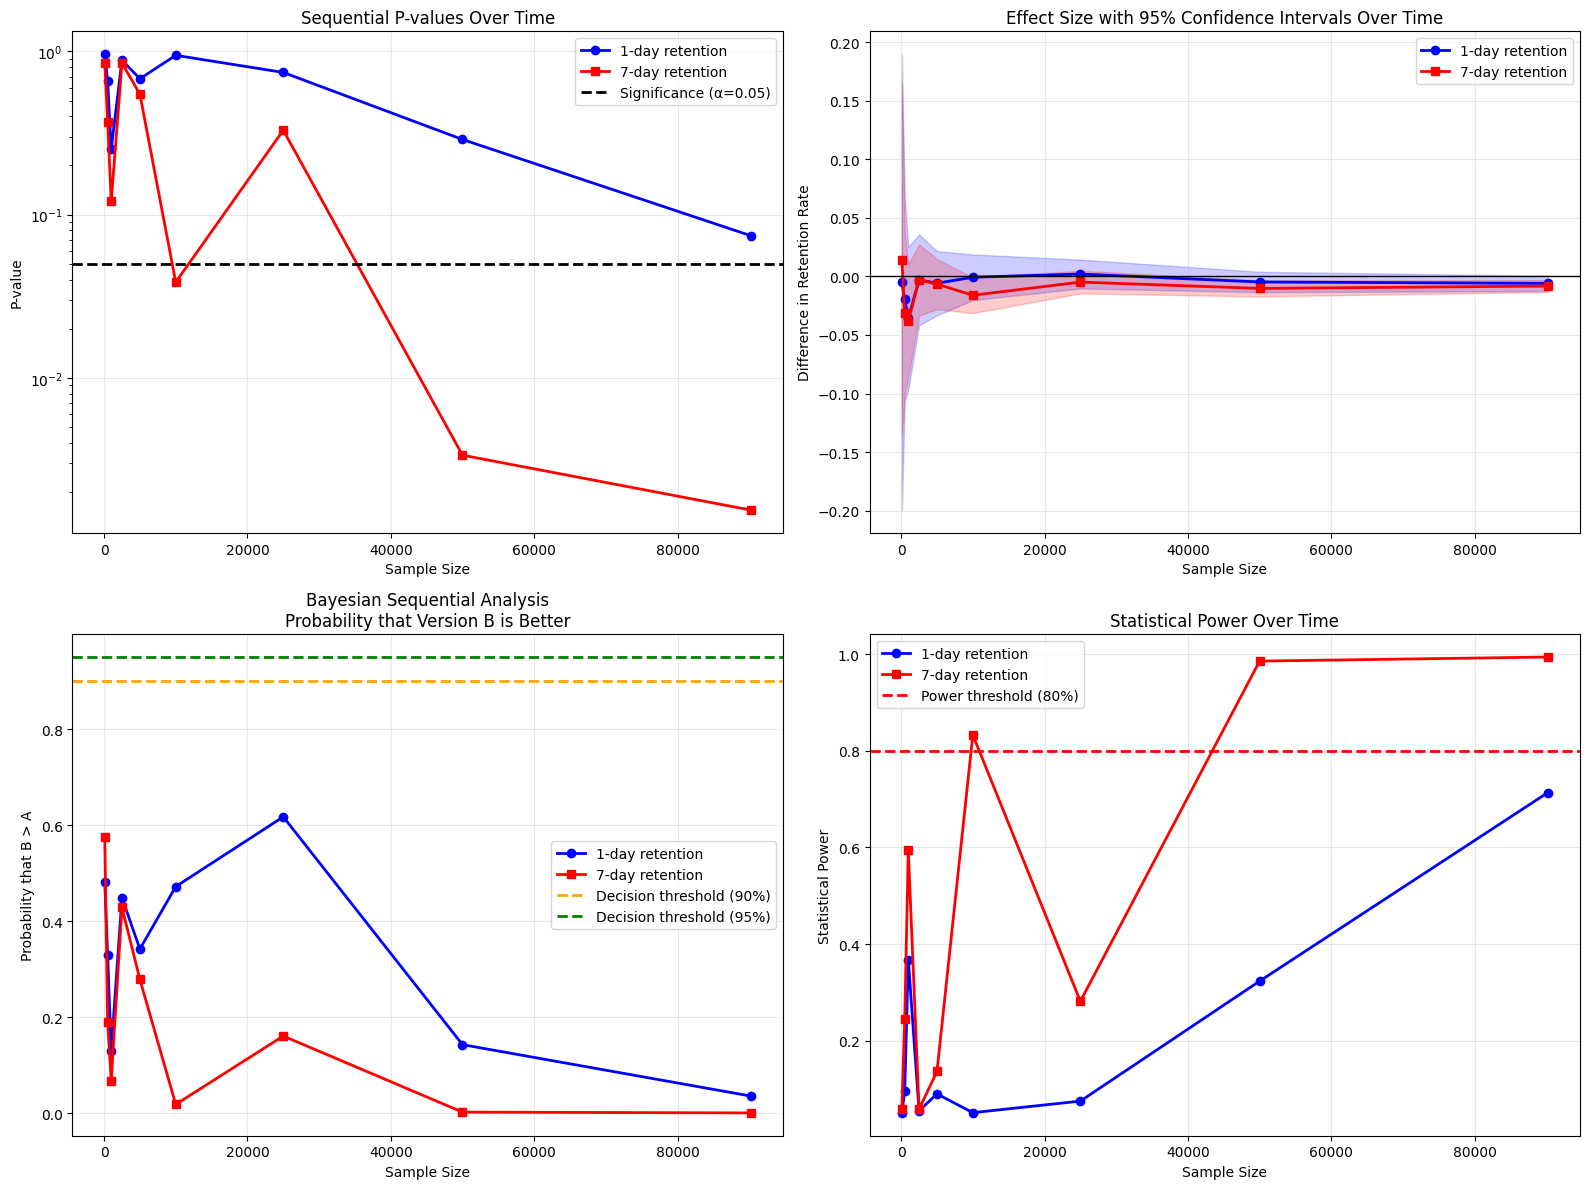


6. EARLY STOPPING ANALYSIS
--------------------------------------------------

1-Day Retention:
No statistically significant results found
Did not reach 80% power

7-Day Retention:
First significant result at: 10,000 users
  P-value: 0.0386
  Effect size: -0.0161
First reached 80% power at: 10,000 users

7. SEQUENTIAL TESTING RECOMMENDATIONS
--------------------------------------------------
Frequentist Sequential Testing:
- Monitor p-values at predetermined checkpoints
- Stop if p-value < α (with O'Brien-Fleming correction)
- Continue until maximum sample size if no early significance

Bayesian Sequential Testing:
- Monitor posterior probability that B > A
- Stop when probability exceeds decision threshold (e.g., 95%)
- Provides intuitive 'probability of superiority' interpretation

Benefits of Sequential Testing:
✓ Can conclude faster if effect is strong
✓ More ethical (stop early if treatment is clearly better/worse)
✓ More efficient use of resources
✓ Bayesian approach provides mo

In [10]:
# TODO
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("=== COOKIE CATS: SEQUENTIAL A/B TESTING ANALYSIS ===\n")

# 1. Load and Prepare Data
print("1. LOADING DATA AND SETTING UP SEQUENTIAL TESTING")
print("-" * 50)

try:
    data = pd.read_csv("./data/cookie_cats.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Creating simulated Cookie Cats data...")
    np.random.seed(42)
    n_users = 90000
    data = pd.DataFrame({
        'userid': range(1, n_users + 1),
        'version': np.random.choice(['gate_30', 'gate_40'], n_users, p=[0.5, 0.5]),
        'sum_gamerounds': np.random.poisson(50, n_users),
        'retention_1': np.random.binomial(1, 0.45, n_users),
        'retention_7': np.random.binomial(1, 0.18, n_users)
    })
    mask_gate_40 = data['version'] == 'gate_40'
    data.loc[mask_gate_40, 'retention_1'] = np.random.binomial(1, 0.47, mask_gate_40.sum())
    data.loc[mask_gate_40, 'retention_7'] = np.random.binomial(1, 0.19, mask_gate_40.sum())

# 2. Sequential Testing Implementation
print(f"\n2. SEQUENTIAL TESTING IMPLEMENTATION")
print("-" * 50)

def sequential_analysis(data, retention_column, checkpoints=None, alpha=0.05, beta=0.2):
    """
    Perform sequential analysis of A/B test data
    """
    if checkpoints is None:
        checkpoints = [100, 500, 1000, 2500, 5000, 10000, 25000, 50000, len(data)]
    
    results = []
    
    for checkpoint in checkpoints:
        if checkpoint > len(data):
            continue
            
        # Get data up to checkpoint
        subset = data.head(checkpoint)
        
        # Split by version
        group_A = subset[subset['version'] == 'gate_30']
        group_B = subset[subset['version'] == 'gate_40']
        
        n_A = len(group_A)
        n_B = len(group_B)
        
        if n_A == 0 or n_B == 0:
            continue
            
        retained_A = group_A[retention_column].sum()
        retained_B = group_B[retention_column].sum()
        
        rate_A = retained_A / n_A
        rate_B = retained_B / n_B
        diff = rate_B - rate_A
        
        # Perform statistical test
        successes = np.array([retained_A, retained_B])
        trials = np.array([n_A, n_B])
        z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')
        
        # Calculate confidence interval
        se_diff = np.sqrt(rate_A * (1 - rate_A) / n_A + rate_B * (1 - rate_B) / n_B)
        ci_lower = diff - 1.96 * se_diff
        ci_upper = diff + 1.96 * se_diff
        
        # Calculate statistical power
        effect_size = 2 * (np.arcsin(np.sqrt(rate_B)) - np.arcsin(np.sqrt(rate_A)))
        from statsmodels.stats.power import NormalIndPower
        power_analysis = NormalIndPower()
        power = power_analysis.power(effect_size, n_A + n_B, alpha, ratio=1)
        
        results.append({
            'checkpoint': checkpoint,
            'n_A': n_A,
            'n_B': n_B,
            'rate_A': rate_A,
            'rate_B': rate_B,
            'diff': diff,
            'p_value': p_value,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'power': power,
            'significant': p_value < alpha
        })
    
    return pd.DataFrame(results)

# 3. Perform Sequential Analysis
print("Running sequential analysis for 1-day retention...")
sequential_results_1day = sequential_analysis(data, 'retention_1')

print("Running sequential analysis for 7-day retention...")
sequential_results_7day = sequential_analysis(data, 'retention_7')

# 4. Sequential Monitoring with O'Brien-Fleming Boundaries
print(f"\n3. SEQUENTIAL MONITORING WITH O'BRIEN-FLEMING BOUNDARIES")
print("-" * 50)

def obrien_fleming_boundaries(alpha=0.05, looks=10):
    """
    Calculate O'Brien-Fleming sequential monitoring boundaries
    """
    from scipy.stats import norm
    z_alpha = norm.ppf(1 - alpha/2)
    boundaries = []
    
    for i in range(1, looks + 1):
        # O'Brien-Fleming boundary
        boundary = z_alpha * np.sqrt(looks / i)
        boundaries.append(boundary)
    
    return boundaries

# Calculate boundaries for our checkpoints
looks = len(sequential_results_1day)
boundaries = obrien_fleming_boundaries(looks=looks)

print(f"O'Brien-Fleming boundaries for {looks} looks:")
for i, boundary in enumerate(boundaries):
    print(f"Look {i+1}: ±{boundary:.3f}")

# 5. Bayesian Sequential Analysis
print(f"\n4. BAYESIAN SEQUENTIAL ANALYSIS")
print("-" * 50)

def bayesian_sequential_analysis(data, retention_column, checkpoints=None):
    """
    Perform Bayesian sequential analysis
    """
    if checkpoints is None:
        checkpoints = [100, 500, 1000, 2500, 5000, 10000, 25000, 50000, len(data)]
    
    results = []
    
    # Prior parameters (weak prior)
    alpha_prior = 1
    beta_prior = 1
    
    for checkpoint in checkpoints:
        if checkpoint > len(data):
            continue
            
        subset = data.head(checkpoint)
        group_A = subset[subset['version'] == 'gate_30']
        group_B = subset[subset['version'] == 'gate_40']
        
        n_A = len(group_A)
        n_B = len(group_B)
        
        if n_A == 0 or n_B == 0:
            continue
            
        retained_A = group_A[retention_column].sum()
        retained_B = group_B[retention_column].sum()
        
        # Posterior distributions
        alpha_post_A = alpha_prior + retained_A
        beta_post_A = beta_prior + n_A - retained_A
        alpha_post_B = alpha_prior + retained_B
        beta_post_B = beta_prior + n_B - retained_B
        
        # Sample from posterior
        n_samples = 10000
        samples_A = np.random.beta(alpha_post_A, beta_post_A, n_samples)
        samples_B = np.random.beta(alpha_post_B, beta_post_B, n_samples)
        
        # Calculate probability that B is better than A
        prob_b_better = np.mean(samples_B > samples_A)
        
        # Calculate credible interval for difference
        diff_samples = samples_B - samples_A
        ci_lower = np.percentile(diff_samples, 2.5)
        ci_upper = np.percentile(diff_samples, 97.5)
        
        results.append({
            'checkpoint': checkpoint,
            'n_A': n_A,
            'n_B': n_B,
            'prob_b_better': prob_b_better,
            'ci_lower_bayes': ci_lower,
            'ci_upper_bayes': ci_upper,
            'decision_threshold_90': prob_b_better > 0.90,
            'decision_threshold_95': prob_b_better > 0.95
        })
    
    return pd.DataFrame(results)

print("Running Bayesian sequential analysis for 1-day retention...")
bayesian_results_1day = bayesian_sequential_analysis(data, 'retention_1')

print("Running Bayesian sequential analysis for 7-day retention...")
bayesian_results_7day = bayesian_sequential_analysis(data, 'retention_7')

# 6. Visualization of Sequential Results
print(f"\n5. SEQUENTIAL ANALYSIS VISUALIZATION")
print("-" * 50)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Frequentist sequential p-values
ax1.plot(sequential_results_1day['checkpoint'], sequential_results_1day['p_value'], 
         marker='o', linewidth=2, label='1-day retention', color='blue')
ax1.plot(sequential_results_7day['checkpoint'], sequential_results_7day['p_value'], 
         marker='s', linewidth=2, label='7-day retention', color='red')
ax1.axhline(y=0.05, color='black', linestyle='--', linewidth=2, label='Significance (α=0.05)')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('P-value')
ax1.set_title('Sequential P-values Over Time')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Effect size over time
ax2.plot(sequential_results_1day['checkpoint'], sequential_results_1day['diff'], 
         marker='o', linewidth=2, label='1-day retention', color='blue')
ax2.fill_between(sequential_results_1day['checkpoint'],
                sequential_results_1day['ci_lower'],
                sequential_results_1day['ci_upper'],
                alpha=0.2, color='blue')

ax2.plot(sequential_results_7day['checkpoint'], sequential_results_7day['diff'], 
         marker='s', linewidth=2, label='7-day retention', color='red')
ax2.fill_between(sequential_results_7day['checkpoint'],
                sequential_results_7day['ci_lower'],
                sequential_results_7day['ci_upper'],
                alpha=0.2, color='red')

ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Difference in Retention Rate')
ax2.set_title('Effect Size with 95% Confidence Intervals Over Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Bayesian probabilities
ax3.plot(bayesian_results_1day['checkpoint'], bayesian_results_1day['prob_b_better'], 
         marker='o', linewidth=2, label='1-day retention', color='blue')
ax3.plot(bayesian_results_7day['checkpoint'], bayesian_results_7day['prob_b_better'], 
         marker='s', linewidth=2, label='7-day retention', color='red')
ax3.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='Decision threshold (90%)')
ax3.axhline(y=0.95, color='green', linestyle='--', linewidth=2, label='Decision threshold (95%)')
ax3.set_xlabel('Sample Size')
ax3.set_ylabel('Probability that B > A')
ax3.set_title('Bayesian Sequential Analysis\nProbability that Version B is Better')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Statistical power over time
ax4.plot(sequential_results_1day['checkpoint'], sequential_results_1day['power'], 
         marker='o', linewidth=2, label='1-day retention', color='blue')
ax4.plot(sequential_results_7day['checkpoint'], sequential_results_7day['power'], 
         marker='s', linewidth=2, label='7-day retention', color='red')
ax4.axhline(y=0.80, color='red', linestyle='--', linewidth=2, label='Power threshold (80%)')
ax4.set_xlabel('Sample Size')
ax4.set_ylabel('Statistical Power')
ax4.set_title('Statistical Power Over Time')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Early Stopping Analysis
print(f"\n6. EARLY STOPPING ANALYSIS")
print("-" * 50)

def analyze_early_stopping(sequential_results, metric_name):
    """Analyze when we could have stopped the test early"""
    print(f"\n{metric_name}:")
    
    # First significant result
    significant_rows = sequential_results[sequential_results['significant'] == True]
    if len(significant_rows) > 0:
        first_significant = significant_rows.iloc[0]
        print(f"First significant result at: {first_significant['checkpoint']:,} users")
        print(f"  P-value: {first_significant['p_value']:.4f}")
        print(f"  Effect size: {first_significant['diff']:.4f}")
    else:
        print("No statistically significant results found")
    
    # When power reached 80%
    powered_rows = sequential_results[sequential_results['power'] >= 0.80]
    if len(powered_rows) > 0:
        first_powered = powered_rows.iloc[0]
        print(f"First reached 80% power at: {first_powered['checkpoint']:,} users")
    else:
        print("Did not reach 80% power")

analyze_early_stopping(sequential_results_1day, "1-Day Retention")
analyze_early_stopping(sequential_results_7day, "7-Day Retention")

# 8. Final Sequential Testing Recommendations
print(f"\n7. SEQUENTIAL TESTING RECOMMENDATIONS")
print("-" * 50)

print("Frequentist Sequential Testing:")
print("- Monitor p-values at predetermined checkpoints")
print("- Stop if p-value < α (with O'Brien-Fleming correction)")
print("- Continue until maximum sample size if no early significance")

print("\nBayesian Sequential Testing:")
print("- Monitor posterior probability that B > A")
print("- Stop when probability exceeds decision threshold (e.g., 95%)")
print("- Provides intuitive 'probability of superiority' interpretation")

print("\nBenefits of Sequential Testing:")
print("✓ Can conclude faster if effect is strong")
print("✓ More ethical (stop early if treatment is clearly better/worse)")
print("✓ More efficient use of resources")
print("✓ Bayesian approach provides more intuitive interpretation")

print("\nRisks/Cautions:")
print("✗ Multiple testing problem (requires boundary adjustments)")
print("✗ Peeking at results without adjustment inflates Type I error")
print("✗ Requires careful planning of checkpoints")

# 9. Compare Final Results
print(f"\n8. FINAL COMPARISON: SEQUENTIAL vs FIXED-HORIZON")
print("-" * 50)

final_frequentist_1day = sequential_results_1day.iloc[-1]
final_bayesian_1day = bayesian_results_1day.iloc[-1]

print("1-DAY RETENTION - FINAL RESULTS:")
print(f"Frequentist: p-value = {final_frequentist_1day['p_value']:.4f}, Significant = {final_frequentist_1day['significant']}")
print(f"Bayesian: P(B > A) = {final_bayesian_1day['prob_b_better']:.3f}")
print(f"Effect size: {final_frequentist_1day['diff']:.4f}")

if final_frequentist_1day['significant']:
    print("✅ RECOMMENDATION: Implement Version B (statistically significant)")
elif final_bayesian_1day['prob_b_better'] > 0.90:
    print("✅ RECOMMENDATION: Implement Version B (high Bayesian probability)")
else:
    print("❌ RECOMMENDATION: Continue testing or stick with Version A")

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [11]:
# TODO
# import numpy as np
from statsmodels.stats.power import TTestIndPower, NormalIndPower

print("=== SIMPLE POWER ANALYSIS FOR SAMPLE SIZE ===\n")

# 1. For Continuous Metrics (T-test)
print("1. CONTINUOUS METRICS (T-test):")
# Parameters
effect_size = 0.2  # Small effect (Cohen's d)
alpha = 0.05       # Significance level
power = 0.80       # Desired power (80%)

# Calculate sample size
power_analysis = TTestIndPower()
sample_size_per_group = power_analysis.solve_power(
    effect_size=effect_size, 
    alpha=alpha, 
    power=power
)

print(f"Effect size: {effect_size}")
print(f"Significance level: {alpha}")
print(f"Desired power: {power}")
print(f"Required sample size per group: {sample_size_per_group:.0f}")
print(f"Total required sample size: {sample_size_per_group * 2:.0f}")

# 2. For Conversion Rates (Proportions)
print("\n2. CONVERSION RATES (Proportions):")
# Parameters
p1 = 0.10  # Baseline conversion rate (10%)
p2 = 0.12  # Expected conversion rate (12%)
alpha = 0.05
power = 0.80

# Calculate effect size for proportions
effect_size_prop = 2 * (np.arcsin(np.sqrt(p2)) - np.arcsin(np.sqrt(p1)))

# Calculate sample size
power_analysis_prop = NormalIndPower()
sample_size_per_group_prop = power_analysis_prop.solve_power(
    effect_size=effect_size_prop,
    alpha=alpha,
    power=power
)

print(f"Baseline rate: {p1:.1%}")
print(f"Expected rate: {p2:.1%}")
print(f"Absolute improvement: {(p2-p1):.1%}")
print(f"Relative improvement: {((p2-p1)/p1):.0%}")
print(f"Required sample size per group: {sample_size_per_group_prop:.0f}")
print(f"Total required sample size: {sample_size_per_group_prop * 2:.0f}")

# 3. Quick Sample Size Table
print("\n3. QUICK SAMPLE SIZE REFERENCE TABLE:")
print("Effect Size | Alpha | Power | Sample per Group")
print("-" * 50)

effect_sizes = [0.1, 0.2, 0.3, 0.5]  # Small, medium, large effects

for eff_size in effect_sizes:
    sample_size = TTestIndPower().solve_power(
        effect_size=eff_size, 
        alpha=0.05, 
        power=0.80
    )
    print(f"    {eff_size}    |  0.05 |  0.80  |     {sample_size:.0f}")

=== SIMPLE POWER ANALYSIS FOR SAMPLE SIZE ===

1. CONTINUOUS METRICS (T-test):
Effect size: 0.2
Significance level: 0.05
Desired power: 0.8
Required sample size per group: 393
Total required sample size: 787

2. CONVERSION RATES (Proportions):
Baseline rate: 10.0%
Expected rate: 12.0%
Absolute improvement: 2.0%
Relative improvement: 20%
Required sample size per group: 3835
Total required sample size: 7669

3. QUICK SAMPLE SIZE REFERENCE TABLE:
Effect Size | Alpha | Power | Sample per Group
--------------------------------------------------
    0.1    |  0.05 |  0.80  |     1571
    0.2    |  0.05 |  0.80  |     393
    0.3    |  0.05 |  0.80  |     175
    0.5    |  0.05 |  0.80  |     64


Enjoy & Happy A/B Testing :) ......!